# 2. Exploring Data

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")

In [220]:
# Path
data_file = "games.csv"

try:
    raw_df = pd.read_csv(data_file)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File {data_file} not found. Please ensure the file is in the correct directory.")

Dataset loaded successfully.


### Describe data

In [221]:
raw_df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


## Explore Dataset Structure

### Number of Rows and Columns

In [222]:
num_rows, num_cols = raw_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 20058
Number of columns: 16


### Check for Duplicated Rows

In [223]:
duplicated_count = raw_df.duplicated(subset='id').sum()
print(f"Number of duplicated rows based on 'id': {duplicated_count}")

raw_df.drop_duplicates(subset='id', keep='first', inplace=True)
print(f"Dataset shape after removing duplicates: {raw_df.shape}")

Number of duplicated rows based on 'id': 945
Dataset shape after removing duplicates: (19113, 16)


### Data Types of Each Column

In [224]:
data_types = raw_df.dtypes
print("Data Types of Each Column:")
print(data_types)

Data Types of Each Column:
id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object


All columns have appropriate data types. No immediate issues detected regarding data types.

## Analyze Numerical Columns

In [225]:
numerical_cols = raw_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical Columns: {numerical_cols}")

Numerical Columns: ['created_at', 'last_move_at', 'turns', 'white_rating', 'black_rating', 'opening_ply']


### Distribution of Values

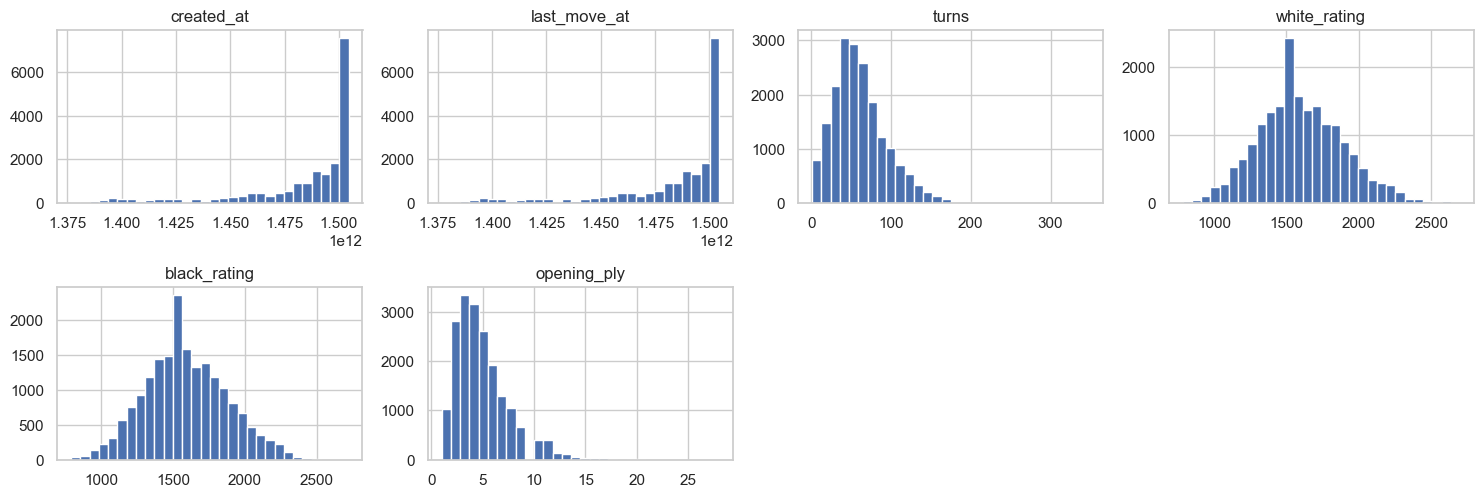

In [226]:
raw_df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

### Percentage of Missing Values

In [227]:
def missing_percentage(df):
    return df.isnull().mean() * 100

missing_values = missing_percentage(raw_df[numerical_cols])
print("Percentage of Missing Values in Numerical Columns:")
print(missing_values)

Percentage of Missing Values in Numerical Columns:
created_at      0.0
last_move_at    0.0
turns           0.0
white_rating    0.0
black_rating    0.0
opening_ply     0.0
dtype: float64


### Min and Max

In [228]:
min_values = raw_df[numerical_cols].min()
max_values = raw_df[numerical_cols].max()

min_max_df = pd.DataFrame({'Min': min_values, 'Max': max_values})
print("Min and Max Values of Numerical Columns:")
print(min_max_df)

Min and Max Values of Numerical Columns:
                       Min           Max
created_at    1.376772e+12  1.504493e+12
last_move_at  1.376772e+12  1.504494e+12
turns         1.000000e+00  3.490000e+02
white_rating  7.840000e+02  2.700000e+03
black_rating  7.890000e+02  2.723000e+03
opening_ply   1.000000e+00  2.800000e+01


### Detect Abnormal Values

In [229]:
for col in numerical_cols:
    Q1 = raw_df[col].quantile(0.25)
    Q3 = raw_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    abnormal = raw_df[(raw_df[col] < lower_bound) | (raw_df[col] > upper_bound)]
    print(f"\nColumn: {col}")
    print(f"Number of Abnormal Values: {abnormal.shape[0]}")


Column: created_at
Number of Abnormal Values: 1814

Column: last_move_at
Number of Abnormal Values: 1814

Column: turns
Number of Abnormal Values: 412

Column: white_rating
Number of Abnormal Values: 130

Column: black_rating
Number of Abnormal Values: 92

Column: opening_ply
Number of Abnormal Values: 859


## Analyze Categorical Columns

In [230]:
# Categorical columns
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Columns: {categorical_cols}\n")

print("\nUnique Values in Categorical Columns:")
for col in raw_df.select_dtypes(include=['object']).columns:
    print(f"{col}: {raw_df[col].unique()[:5]}... \n")

Categorical Columns: ['id', 'victory_status', 'winner', 'increment_code', 'white_id', 'black_id', 'moves', 'opening_eco', 'opening_name']


Unique Values in Categorical Columns:
id: ['TZJHLljE' 'l1NXvwaE' 'mIICvQHh' 'kWKvrqYL' '9tXo1AUZ']... 

victory_status: ['outoftime' 'resign' 'mate' 'draw']... 

winner: ['white' 'black' 'draw']... 

increment_code: ['15+2' '5+10' '20+0' '30+3' '10+0']... 

white_id: ['bourgris' 'a-00' 'ischia' 'daniamurashov' 'nik221107']... 

black_id: ['a-00' 'skinnerua' 'adivanov2009' 'franklin14532' 'daniel_likes_chess']... 

moves: ['d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4'
 'd4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+'
 'e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc6 bxc6 Ra6 Nc4 a4 c3 a3 Nxa3 Rxa3 Rxa3 c4 dxc4 d5 cxd5 Qxd5 exd5 Be6 Ra8+ Ke7 Bc5+ Kf6 Bxf8 Kg6 Bxg7 Kxg7 dxe6 Kh6 exf7 Nf6 Rxh8 Nh5 Bxh5 Kg5 Rxh7 Kf5 Qf3+ Ke6 Bg4+ Kd6 Rh6+ Kc5 Qe3+ Kb5 c4+ Kb4 Qc3+ Ka4 Bd1#'
 'd4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O-O O-O-

### Percentage of Missing Values

In [231]:
missing_cat = missing_percentage(raw_df[categorical_cols])
print("Percentage of Missing Values in Categorical Columns:")
print(missing_cat)

Percentage of Missing Values in Categorical Columns:
id                0.0
victory_status    0.0
winner            0.0
increment_code    0.0
white_id          0.0
black_id          0.0
moves             0.0
opening_eco       0.0
opening_name      0.0
dtype: float64


### Number of Unique Values and Examples

In [232]:
for col in categorical_cols:
    unique_count = raw_df[col].nunique()
    sample_values = raw_df[col].dropna().unique()[:5] 
    print(f"\nColumn: {col}")
    print(f"Number of Unique Values: {unique_count}")
    print(f"Sample Values: {sample_values}")


Column: id
Number of Unique Values: 19113
Sample Values: ['TZJHLljE' 'l1NXvwaE' 'mIICvQHh' 'kWKvrqYL' '9tXo1AUZ']

Column: victory_status
Number of Unique Values: 4
Sample Values: ['outoftime' 'resign' 'mate' 'draw']

Column: winner
Number of Unique Values: 3
Sample Values: ['white' 'black' 'draw']

Column: increment_code
Number of Unique Values: 400
Sample Values: ['15+2' '5+10' '20+0' '30+3' '10+0']

Column: white_id
Number of Unique Values: 9438
Sample Values: ['bourgris' 'a-00' 'ischia' 'daniamurashov' 'nik221107']

Column: black_id
Number of Unique Values: 9331
Sample Values: ['a-00' 'skinnerua' 'adivanov2009' 'franklin14532' 'daniel_likes_chess']

Column: moves
Number of Unique Values: 18920
Sample Values: ['d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4'
 'd4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+'
 'e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc6 bxc6 Ra6 Nc4 a4 c3 a3 Nxa3 Rxa3 Rxa3 c4 dxc4 d5 cxd5 Qxd5 exd5 Be6 Ra8+ Ke7 Bc5+ Kf6 Bxf8 Kg6 Bxg7 Kxg7 d

### Detect Abnormal Values

In [233]:
for col in categorical_cols:
    value_counts = raw_df[col].value_counts()
    print(f"\nColumn: {col}")
    print(value_counts.head())
    print(value_counts.tail())


Column: id
id
TZJHLljE    1
ojkMBE49    1
JTfFY9HD    1
0wkPVyCT    1
9oQQUmDI    1
Name: count, dtype: int64
id
VQYAN5Gg    1
jsSuL4AK    1
akJMiDuY    1
xtdvNSoe    1
N8G2JHGG    1
Name: count, dtype: int64

Column: victory_status
victory_status
resign       10695
mate          5974
outoftime     1598
draw           846
Name: count, dtype: int64
victory_status
resign       10695
mate          5974
outoftime     1598
draw           846
Name: count, dtype: int64

Column: winner
winner
white    9545
black    8680
draw      888
Name: count, dtype: int64
winner
white    9545
black    8680
draw      888
Name: count, dtype: int64

Column: increment_code
increment_code
10+0     7356
15+0     1258
15+15     821
5+5       723
5+8       678
Name: count, dtype: int64
increment_code
17+2      1
14+5      1
90+120    1
11+7      1
14+15     1
Name: count, dtype: int64

Column: white_id
white_id
ssf7             48
bleda            48
hassan1365416    44
khelil           41
1240100948       38
Nam

## Save

In [234]:
# Drop unnecessary columns
columns_to_drop = [] # ["id", "moves", "created_at", "last_move_at"]
clean_df = raw_df.drop(columns=columns_to_drop)
print(f"Dataset shape after dropping columns: {clean_df.shape}")

# Save the cleaned DataFrame
clean_data_file = "clean_lichess_games.csv"
clean_df.to_csv(clean_data_file, index=False, encoding='utf-8')
print(f"Cleaned data saved to {clean_data_file}.")

Dataset shape after dropping columns: (19113, 16)
Cleaned data saved to clean_lichess_games.csv.
